# Symbols classification

This example demonstrates how to construct a neural network capable of classifying symbols. 

In [30]:
import os
import http
import tarfile
from random import randint
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

my_files_path = Path("symbols_classification_files")

## Data

Let's load and examine the data we'll use to train our model.

### Loading and unpacking

The follwing code loads data and unpacks them.

In [5]:
target_file_path = my_files_path/"notMNIST_small.tar.gz"
data_folder_path = my_files_path/"notMNIST_small"

if not target_file_path.exists():
    conn = http.client.HTTPConnection("yaroslavvb.com", 80)
    conn.request("GET", "/upload/notMNIST/notMNIST_small.tar.gz")
    data = conn.getresponse().read()
    with open(target_file_path, "wb") as f:
        f.write(data)

if not data_folder_path.exists():
    with tarfile.open(target_file_path) as f:
        f.extractall(str(my_files_path))

We got a batch of folders each represent some class.

In [8]:
os.listdir(data_folder_path)

['I', 'B', 'F', 'E', 'H', 'G', 'C', 'D', 'A', 'J']

Each folder contains numerous images, for corresponding symbol. 

In [10]:
os.listdir(data_folder_path/"C")[:5]

['Q29vcGVyQmxhRCBJdGFsaWMudHRm.png',
 'RmFnb0V4TGYtRXh0cmFCb2xkSXRhbGljQ2Fwcy5vdGY=.png',
 'QmFza2VydmxsZTIgQlQgUm9tYW4udHRm.png',
 'QW1lbGlhTEwub3Rm.png',
 'SHViYnViIFNTaSBCb2xkLnR0Zg==.png']

### Interpret as tensors

Now that we have images, we need to interpret them as tensors - the following code loads them as `np.ndarrays`.

In [24]:
mages, labels, images = [], [], []
for img_path in data_folder_path.glob("**/*.png"):
    # Foleder name is a class label
    img_label = img_path.parts[-2]
    try:
        image = plt.imread(img_path)
    except SyntaxError:
        print(f"Loading error for {img_path}")
        continue
    labels.append(img_label)
    images.append(image)

X, y = np.stack(images, axis=0), np.stack(labels, axis=0)

Loading error for symbols_classification_files/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png
Loading error for symbols_classification_files/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png


We have successfully created an `X` tensor containing 18,724 images, each with a size of 28x28 pixels.  Alongside this, we have a `y` tensor holding 18,724 corresponding labels. 

In [25]:
X.shape, y.shape

((18724, 28, 28), (18724,))

To verify the data has loaded correctly, let's randomly sample images and display their titles alongside their corresponding labels. 

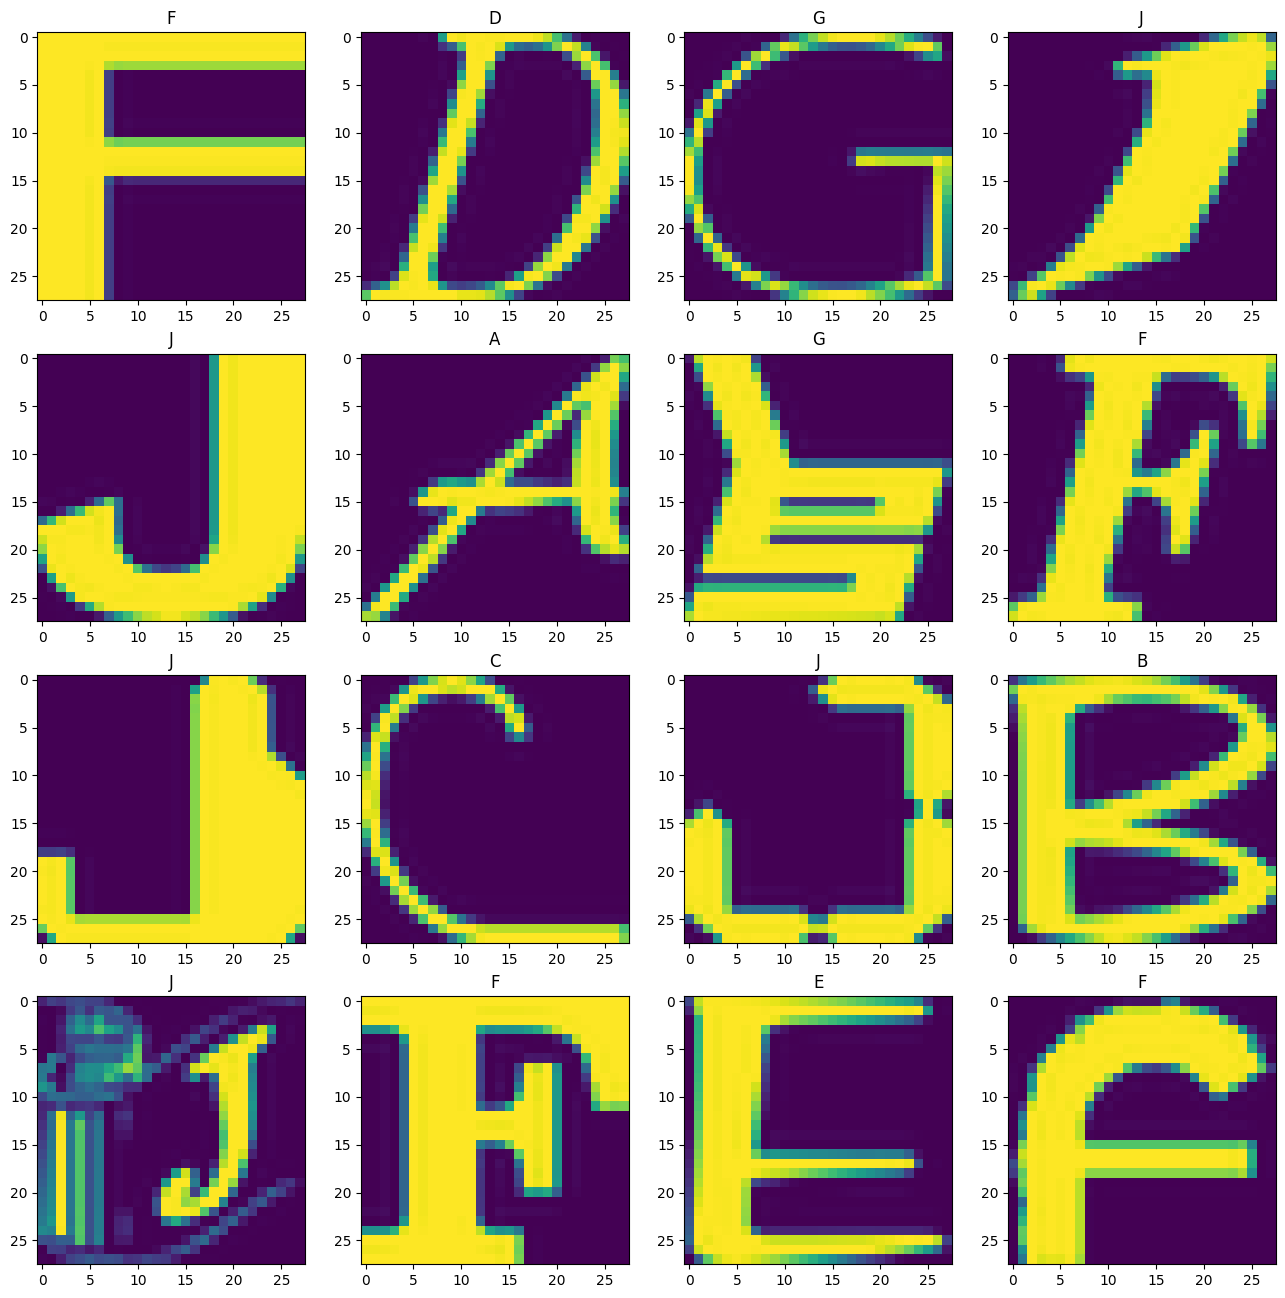

In [39]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for row in range(4):
    for col in range(4):
        idx = 4 * row + col
        idnex = randint(0, len(X))
        ax[row][col].imshow(X[idnex])
        ax[row][col].set_title(f"{y[idnex]}")